In [1]:
#library(performance)
library(ggplot2)
library(olsrr)
library(eurostat)
options(width=160, repr.plot.width=11, repr.plot.height=7) 


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




# Úkoly

V tomto cvičení si zkusíte lineární regresi na datech o počtech cestujících ve vlakové dopravě v Německu. Datová sada včetně popisu je k dispozici zde:

https://ec.europa.eu/eurostat/databrowser/view/RAIL_PA_QUARTAL__custom_5435756/default/line?lang=en

## Úkol 1: Příprava dat

Nejprve je třeba připravit data podle následujícího popisu.

**Data pro analýzu:**
- identifikátor datasetu: `rail_pa_quartal`
- NUTS: Německo (`DE`)
- jednotky: Tisíce pasažérů (`THS_PAS`)
- datum: od počátku měření do 2020-01-01 včetně

Výsledný data.frame by měl obsahovat pouze sloupce `time` a `values`.

In [2]:
data <- get_eurostat('rail_pa_quartal')

Table rail_pa_quartal cached at /tmp/Rtmp5hUuHE/eurostat/rail_pa_quartal_date_code_FF.rds



In [3]:
df <- data[data$geo == 'DE',]
df <- df[df$unit == 'THS_PAS',]
df <- df[df$time <= "2020-01-01",] #as.Date("2020-01-01"),]
df$unit <- NULL
df$geo <- NULL
head(df)
tail(df)

time,values
<date>,<dbl>
2020-01-01,620036
2019-10-01,743856
2019-07-01,731455
2019-04-01,725410
2019-01-01,720915
2018-10-01,747517


time,values
<date>,<dbl>
2005-04-01,522200
2005-01-01,510600
2004-10-01,536800
2004-07-01,507800
2004-04-01,506400
2004-01-01,519600


## Úkol 2: úprava sloupce `time`

Pro účely analýzy upravte sloupec `time` tak, aby např. pro rok 2019 měl kvartální hodnoty 2019.0, 2019.25, 2019.50, 2019.75. Analogicky pro všechny ostatní roky.

In [4]:
df$time = seq(2020, 2004.0, by=-0.25)
head(df)

time,values
<dbl>,<dbl>
2020.00,620036
2019.75,743856
2019.50,731455
2019.25,725410
2019.00,720915
2018.75,747517


## Úkol 3: Vizuální analýza dat

Vykreslete data a rozmyslete, jaký model byste zkoušeli.

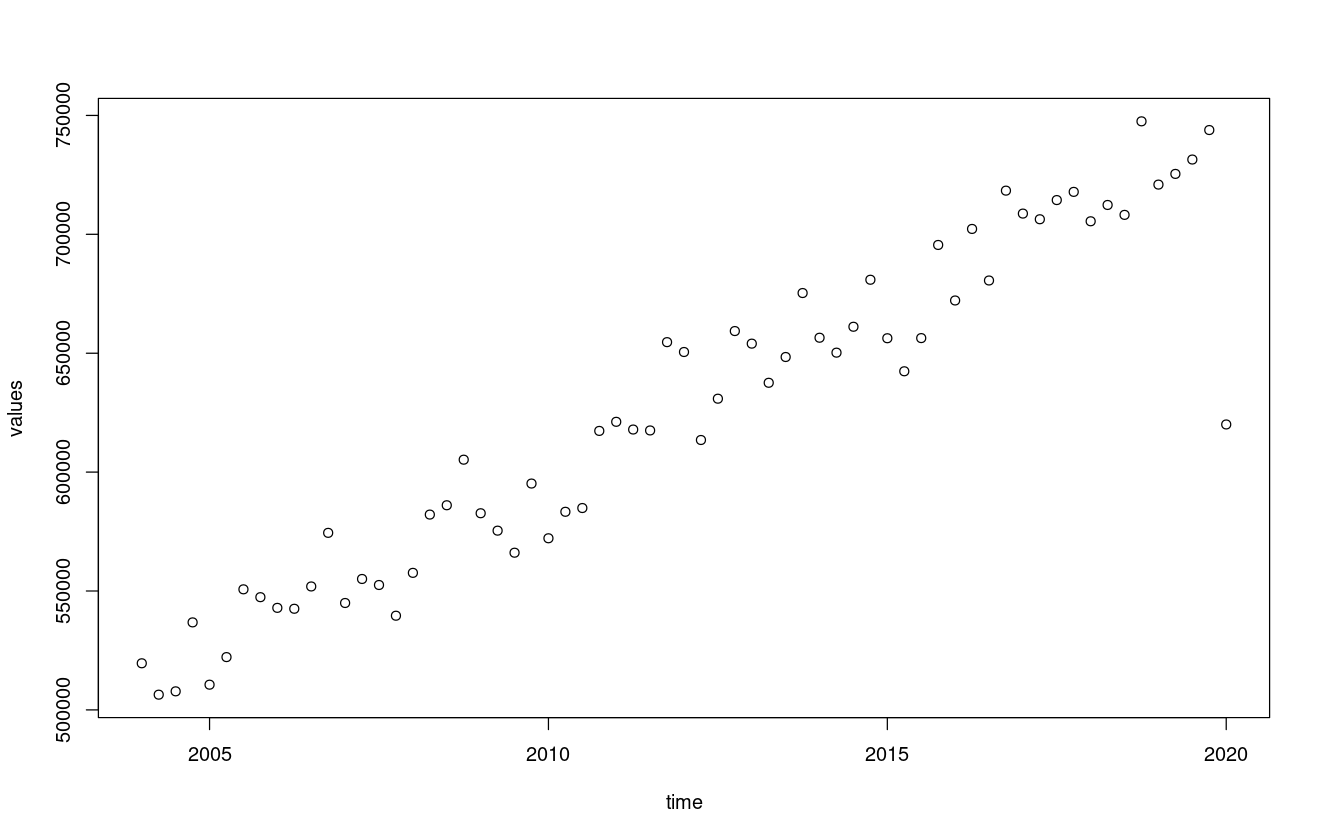

In [5]:
#df <- df[-1,]
plot(df)

## Úkol 4: Předběžná volba modelu

Zkuste pomocí ggplot2 vložit pokusně pár modelů a diskutujte o dosažených výsledcích.

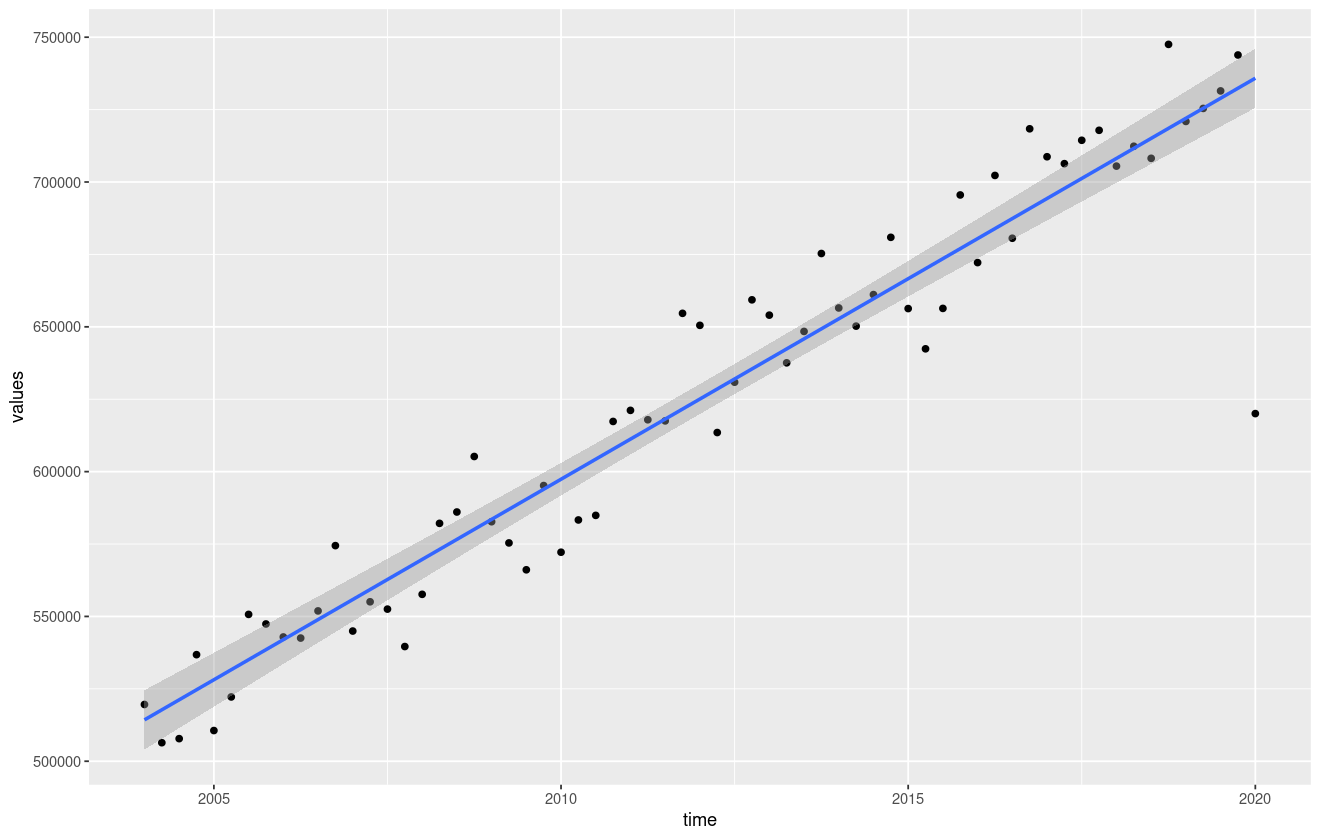

In [6]:
ggplot(df, aes(x=time, y=values)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~x)

## Úkol 5: Odhad parametrů zvoleného modelu

Odhadněte parametry zvoleného modelu. Diskutujte o výsledcích (hodnotách odhadů, výsledcích testů, koeficientech determinace atd.). Proveďte i predikci pro vybrané období.

In [7]:
fit <- lm(values ~ time, data=df)
tmp <- predict(fit, interval="prediction")
df <- cbind(df, tmp)

Warning message in predict.lm(fit, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


In [8]:
summary(fit)


Call:
lm(formula = values ~ time, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-115811  -10235     921   12121   33046 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.724e+07  1.111e+06  -24.51   <2e-16 ***
time         1.385e+04  5.524e+02   25.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20890 on 63 degrees of freedom
Multiple R-squared:  0.9089,	Adjusted R-squared:  0.9074 
F-statistic: 628.4 on 1 and 63 DF,  p-value: < 2.2e-16


## Úkol 6: Vykreslení výsledků

Vykreslete data, nafitovaný model a predikční intervaly. Diskutujte o dosažených výsledcích.

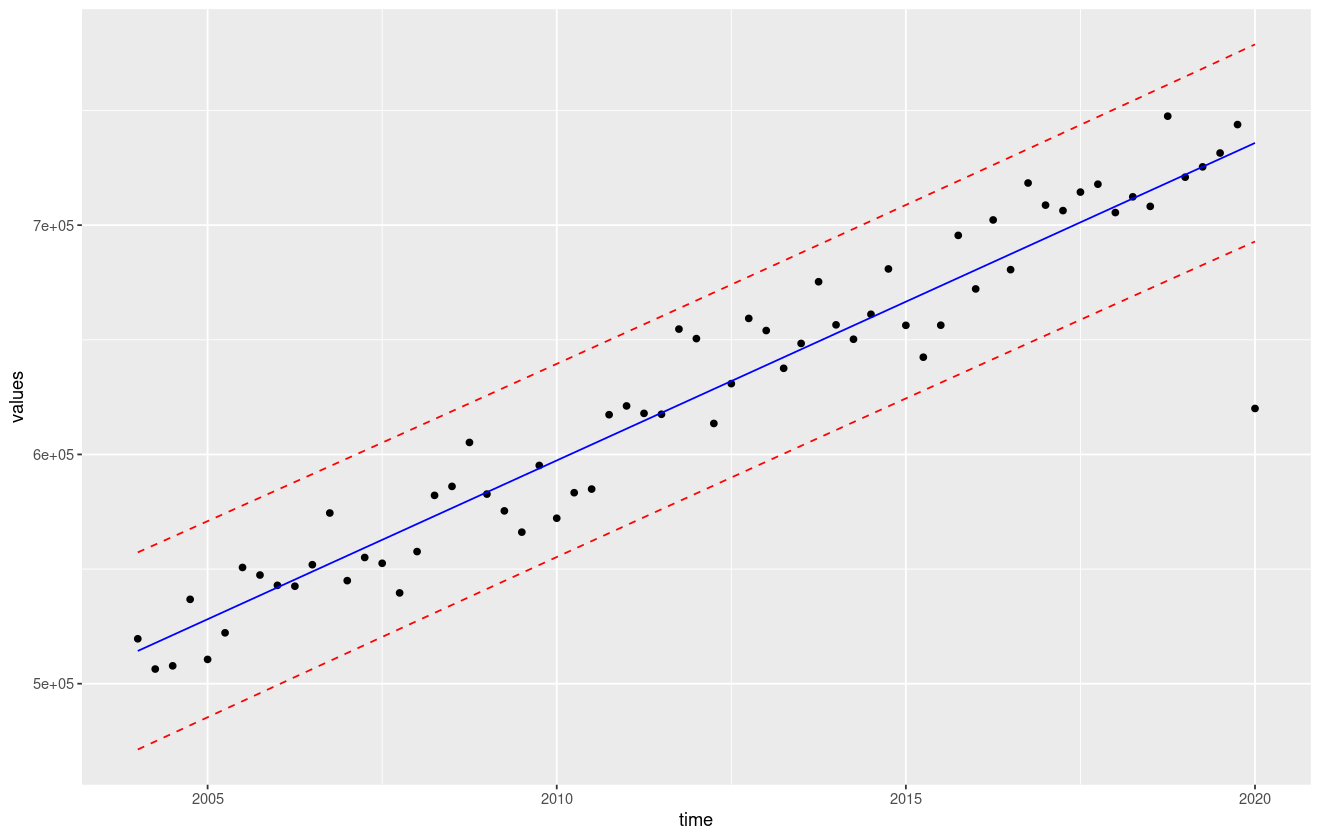

In [9]:
ggplot(df, aes(x=time, y=values)) +
    geom_point() +
    geom_line(aes(y=fit), color='blue') +
    geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
    geom_line(aes(y=upr), color = "red", linetype = "dashed")

## Úkol 7: Analýza rezidují - graf reziduí, test autokorelace

Analyzujte rezidua pomocí grafu reziduí (*Residuals vs Fitted*). Proveďte test autokorelace reziduí. Diskutujte o výsledcích.

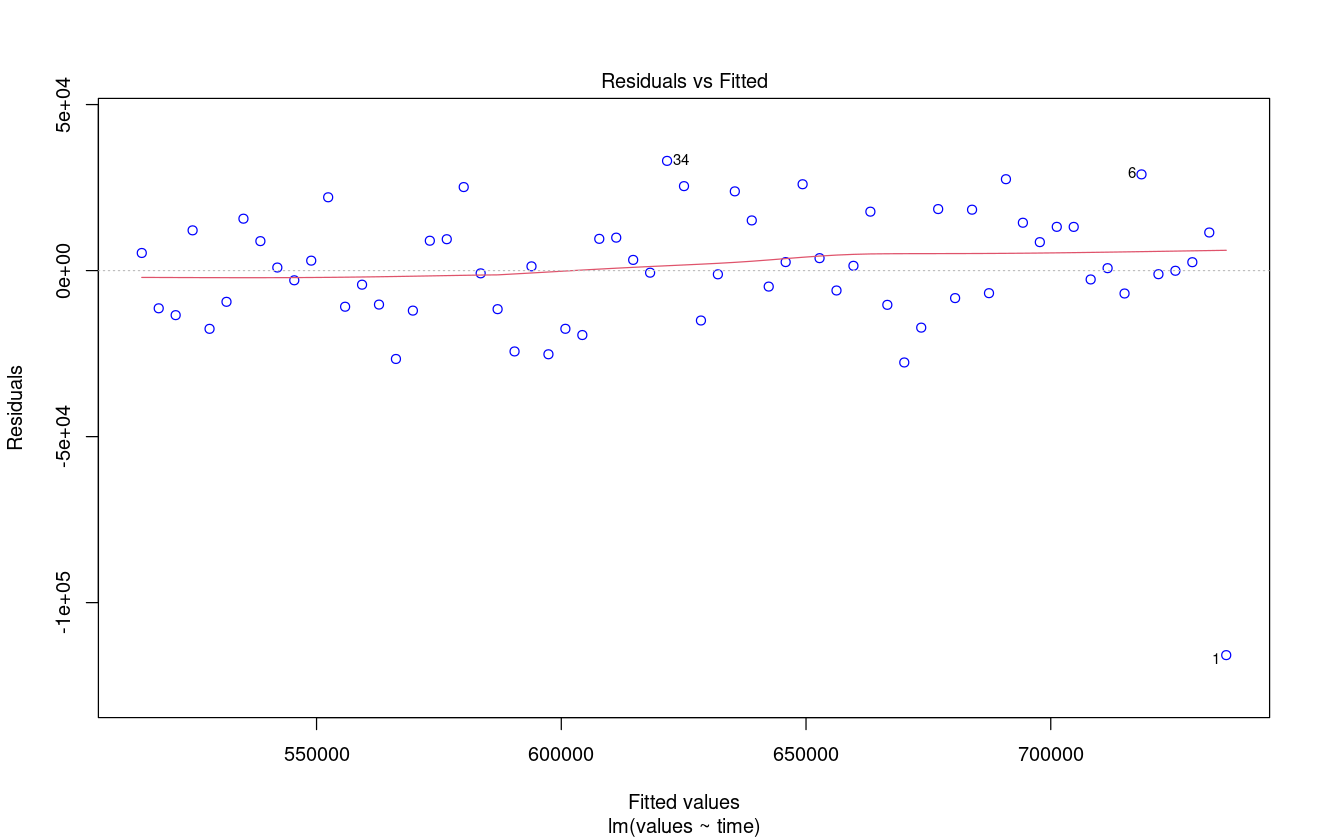

In [10]:
plot(fit, which=1, col=c("blue"))

In [11]:
ols_test_correlation(fit)

[1] 0.8861112

## Úkol 8: Analýza rezidují - normalita

Graficky i pomocí testů analyzujte normalitu reziduí.

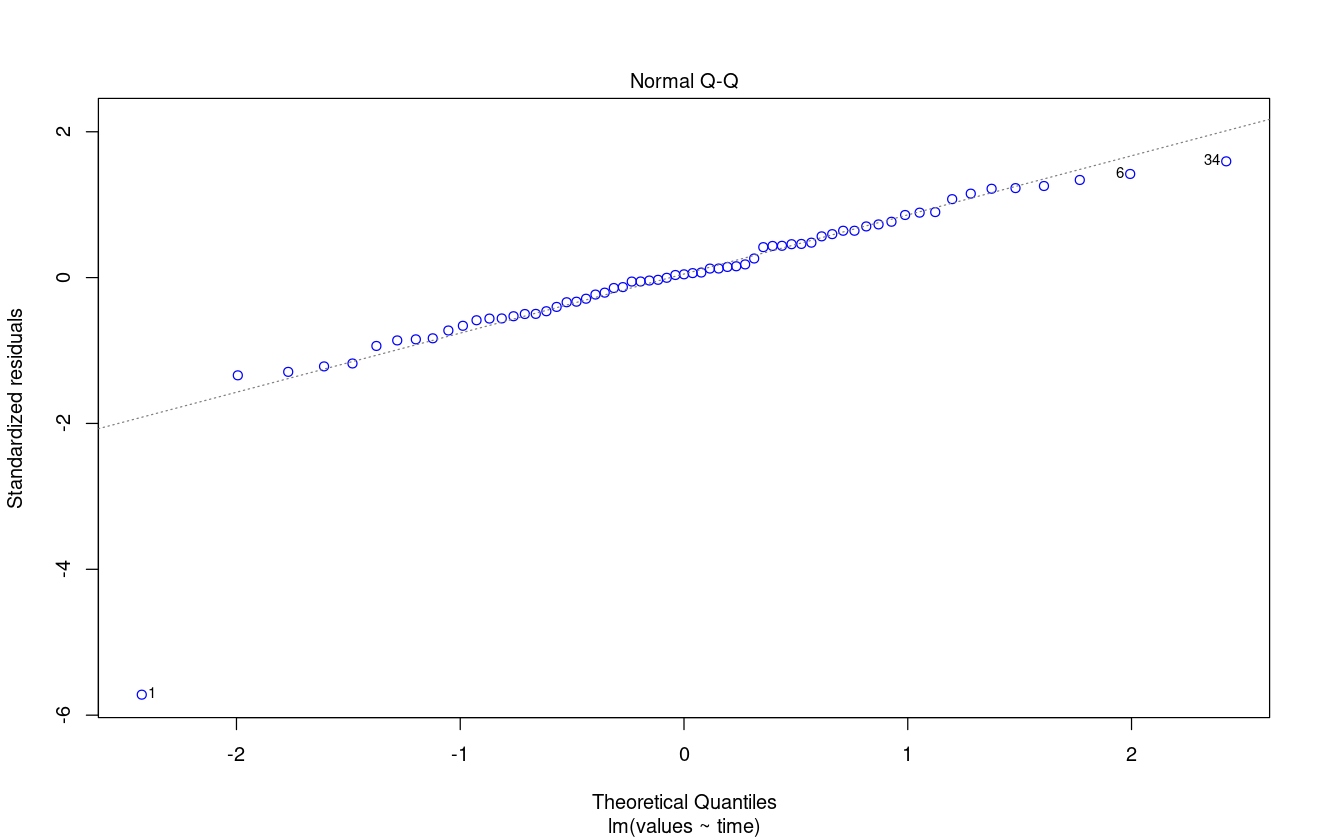

In [12]:
plot(fit, which=2, col=c("blue"))

In [13]:
ols_test_normality(fit)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.802          0.0000 
Kolmogorov-Smirnov        0.1112         0.3701 
Cramer-von Mises          5.4513         0.0000 
Anderson-Darling          1.5011          7e-04 
-----------------------------------------------

## Úkol 9: Analýza rezidují - homoskedasticita

Ověřte graficky i testem, zda jsou rezidua homoskedastická.

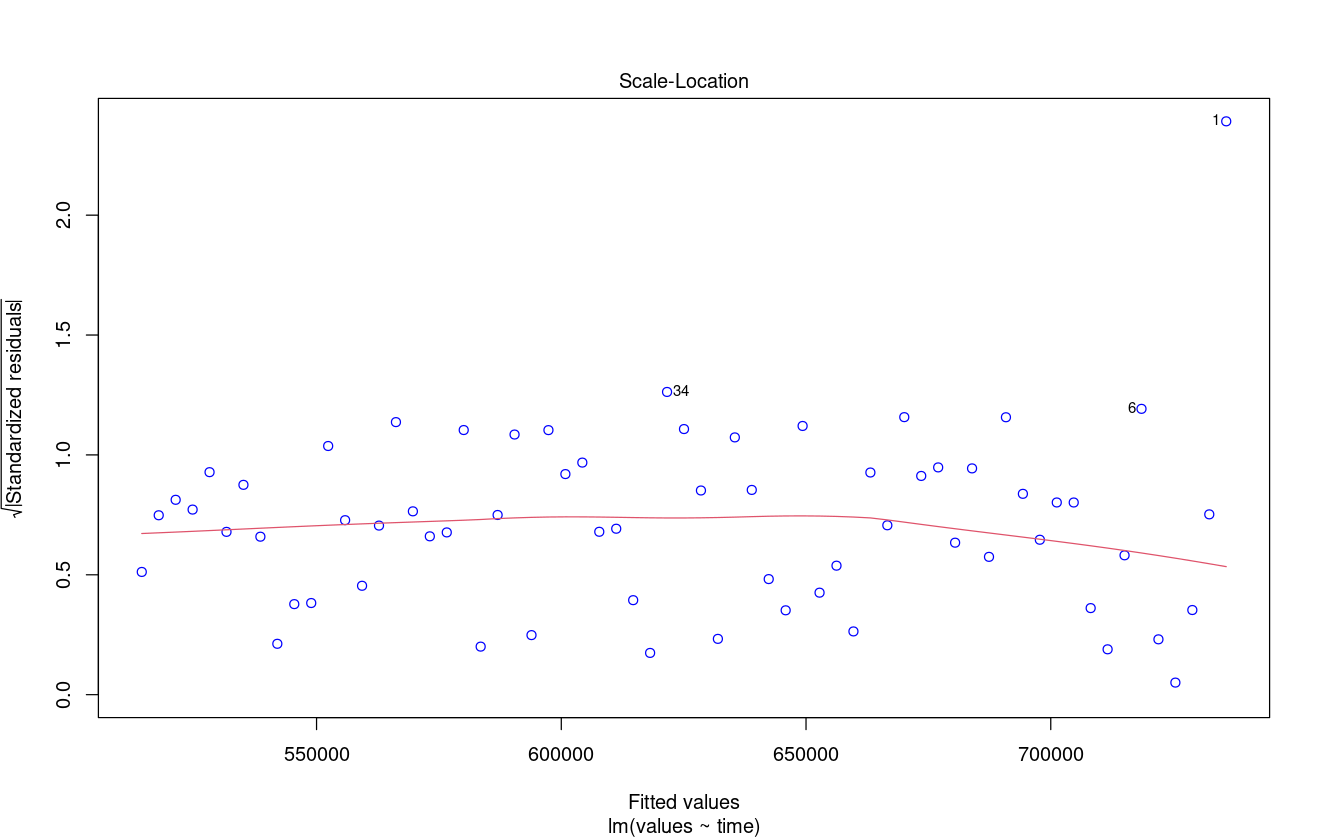

In [14]:
plot(fit, which=3, col=c("blue"))

In [15]:
ols_test_breusch_pagan(fit)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                
 ----------------------------------
 Response : values 
 Variables: fitted values of values 

         Test Summary           
 -------------------------------
 DF            =    1 
 Chi2          =    22.82682 
 Prob > Chi2   =    1.772746e-06 

## Úkol 10: Analýza vlivu pozorování na hodnoty odhadů

Pomocí Cookovy vzdálenosti vyhodnoťe přítomnost potenciálně odlehlých hodnot.

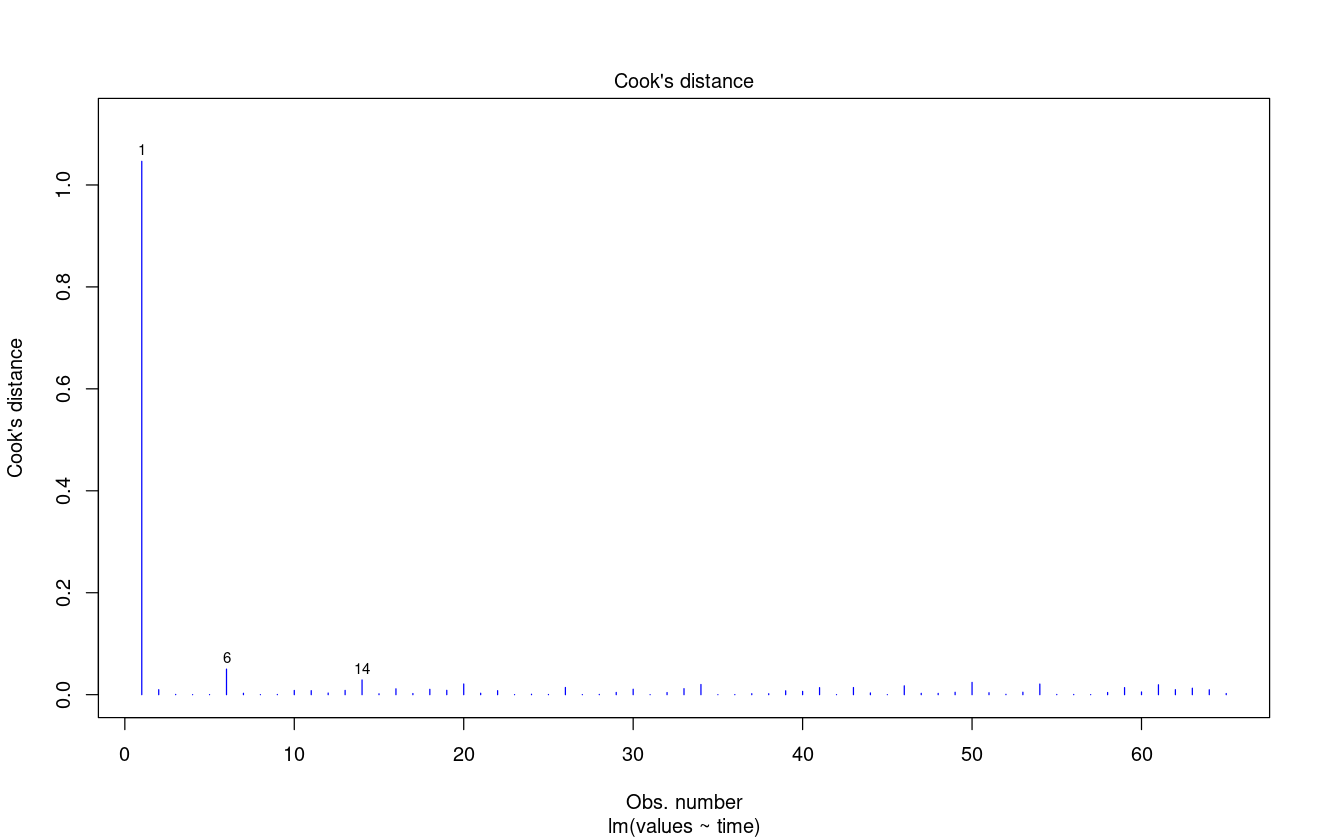

In [16]:
plot(fit, which=4, col=c("blue"))

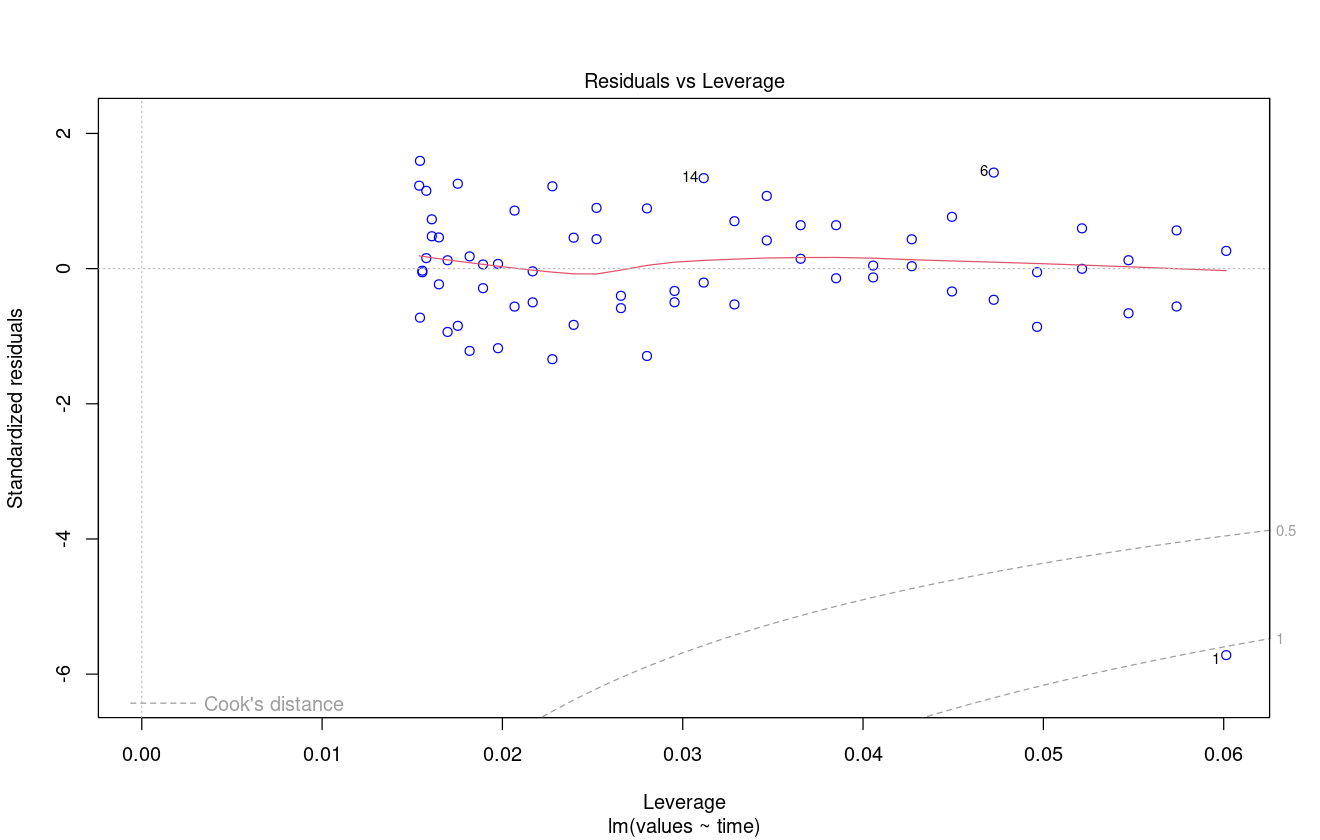

In [17]:
plot(fit, which=5, col=c("blue"))

## Úkol 11: Úprava datasetu

V datech jsme našli jedno velmi významné pozorování, které bychom měli ošetřit. Zkuste jej z datasetu vyfiltrovat, nafitovat model znovu a porovnat výsledky.

## Úkol 12: Predikce budoucích hodnot (samostatně)

Samostatně si zkuste napredikovat budoucí hodnoty. Využijte i hodnoty z původního datasetu, které jsme vynechali. Porovnejte predikce, realitu, zdůvodněte rozdíly a navrhněte, jak byste situaci řešili.